In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),   
                                    tf.keras.layers.Dense(128, activation='relu'),   
                                    tf.keras.layers.Dropout(0.2),   
                                    tf.keras.layers.Dense(10, activation='softmax') ])
model.compile(optimizer='adam',               
              loss='sparse_categorical_crossentropy',               
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5) # użyj verbose=0 jeśli jest problem z konsolą
model.evaluate(x_test, y_test)
 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\gabry\Desktop\School_projects\KNO\KNO\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.2985
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9564 - loss: 0.1441
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1001


[0.10014493018388748, 0.9706000089645386]

In [3]:
model.save("mnist_model.keras")

In [4]:
from tensorflow import keras

saved_model = keras.models.load_model("mnist_model.keras")

In [5]:
saved_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.1001


[0.10014493018388748, 0.9706000089645386]

In [10]:
import tensorflow as tf
import os

model_path = "mnist_model.keras"

if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
else:
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    model.save(model_path)

model.evaluate(x_test, y_test)

Epoch 1/5


c:\Users\gabry\Desktop\School_projects\KNO\KNO\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9154 - loss: 0.2900 - val_accuracy: 0.9588 - val_loss: 0.1366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9592 - loss: 0.1387 - val_accuracy: 0.9722 - val_loss: 0.0963
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1051 - val_accuracy: 0.9745 - val_loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0863 - val_accuracy: 0.9738 - val_loss: 0.0856
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9776 - loss: 0.0726 - val_accuracy: 0.9776 - val_loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.0733


[0.07332883030176163, 0.9775999784469604]

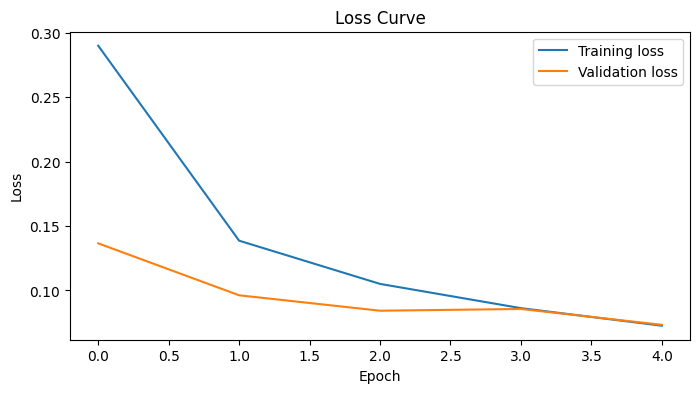

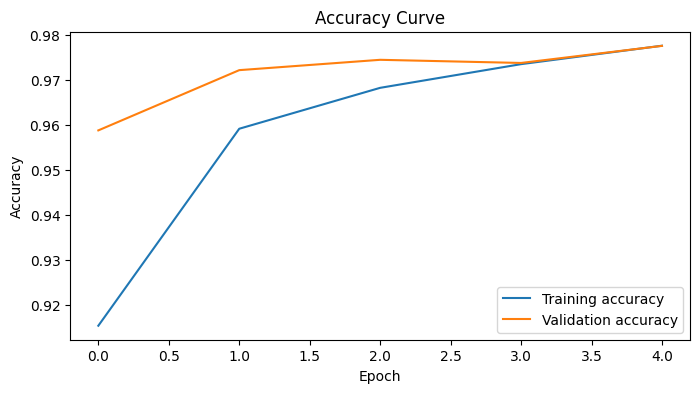

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()